In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

## Transformační vztah


Rotace kolem osy z:

$$

\begin{pmatrix}
    x' \\ 
    y' \\
    z'
\end{pmatrix}
=
\begin{pmatrix}
    \cos(\phi) & -\sin(\phi) & 0 \\
    \sin(\phi) &  \cos(\phi) & 0 \\
    0          &  0          & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
    x \\ 
    y \\
    z
\end{pmatrix}

$$

Bod se natočí do roviny poloroviny yz (y (0,inf); z (-inf; inf))

In [55]:
def rot_z(phi, X):
    T_1 = np.array([[np.cos(phi), -np.sin(phi), 0],
                    [np.sin(phi),  np.cos(phi), 0], 
                    [0          ,  0          , 1]])
    return(np.matmul(T_1,X), T_1)

def rot_x(theta, X):
    T_1 = np.array([[1, 0            ,  0            ],
                    [0, np.cos(theta), -np.sin(theta)],
                    [0, np.sin(theta),  np.cos(theta)]])
    return(np.matmul(T_1,X), T_1)

def point(phi, theta):

    a = np.array([0.,0.,0.])
    
    #print("phi =",phi,"a theta =",theta)

    a[0] = np.cos(phi) * np.sin(theta)
    a[1] = np.sin(phi) * np.sin(theta)
    a[2] = np.cos(theta)

    return(a)

def transform(X):
    
    alpha = np.arctan2(X[0],X[1])
    X_1, T_1 = rot_z(alpha, X)
    
    beta = np.arctan2(X_1[1],X_1[2])
    X_2, T_2 = rot_x(beta, X_1)

    return(X_1, X_2, np.matmul(T_2,T_1), np.matmul(np.matmul(T_2,T_1),X))

def transform_for_animation(X, steps_x, steps_y):
    
    X_1 = [X]

    alpha = np.arctan2(X[0],X[1])

    for i in range(steps_x):
        X_1.append(rot_z(alpha/steps_x, X_1[-1])[0])
        
    beta = np.arctan2(X_1[-1][1],X_1[1][2])

    for j in range(steps_y):
        X_1.append(rot_x(beta/steps_y, X_1[-1])[0])

    return(X_1) 

In [56]:
bod = point(np.deg2rad(0), np.deg2rad(90))
print(bod)

[1.000000e+00 0.000000e+00 6.123234e-17]


In [58]:
transform_for_animation(bod, 5, 5)

[array([1.000000e+00, 0.000000e+00, 6.123234e-17]),
 array([9.51056516e-01, 3.09016994e-01, 6.12323400e-17]),
 array([8.09016994e-01, 5.87785252e-01, 6.12323400e-17]),
 array([5.87785252e-01, 8.09016994e-01, 6.12323400e-17]),
 array([3.09016994e-01, 9.51056516e-01, 6.12323400e-17]),
 array([-4.0862922e-17,  1.0000000e+00,  6.1232340e-17]),
 array([-4.08629220e-17,  9.51056516e-01,  3.09016994e-01]),
 array([-4.08629220e-17,  8.09016994e-01,  5.87785252e-01]),
 array([-4.08629220e-17,  5.87785252e-01,  8.09016994e-01]),
 array([-4.08629220e-17,  3.09016994e-01,  9.51056516e-01]),
 array([-4.08629220e-17, -5.43380661e-17,  1.00000000e+00])]

In [47]:
transform(bod)

(array([6.123234e-17, 1.000000e+00, 6.123234e-17]),
 array([6.123234e-17, 0.000000e+00, 1.000000e+00]),
 array([[ 6.12323400e-17, -1.00000000e+00,  0.00000000e+00],
        [ 6.12323400e-17,  3.74939946e-33, -1.00000000e+00],
        [ 1.00000000e+00,  6.12323400e-17,  6.12323400e-17]]),
 array([6.123234e-17, 0.000000e+00, 1.000000e+00]))

In [76]:
phi = np.linspace(0,2*np.pi,20)
theta = np.linspace(0,np.pi,20)

X = [[0.],[0.],[0.]]

for i in range (len(phi)):
    for n in range (len(theta)):
        X[0].append(np.cos(phi[i])*np.sin(theta[n]))
        X[1].append(np.sin(phi[i])*np.sin(theta[n]))
        X[2].append(np.cos(theta[n]))


bod = point(np.deg2rad(270), np.deg2rad(90))
moving_point = transform_for_animation(bod, 10, 10)

(-1.0, 1.0)

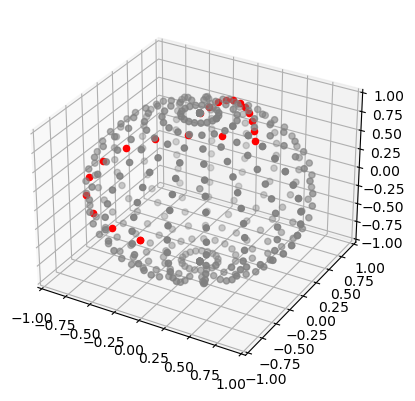

In [77]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[0], X[1], X[2], color = "gray")

for i in range(len(moving_point)):
    lol = ax.scatter(moving_point[i][0], moving_point[i][1], moving_point[i][2], color = "red")

ax.scatter(bod[0], bod[1], bod[2], color = "red")

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

In [61]:
a = transform_for_animation(bod, 5, 5)
len(a)

11